In [1]:
#import spikeinterface modules
import spikeinterface as si
import spikeinterface.extractors as se
import spikeinterface.toolkit as st
import spikeinterface.sorters as ss
import spikeinterface.comparison as sc
import spikeinterface.widgets as sw
import numpy as np
import glob

#import everything else
import os
import sys
import numpy as np
import neo
import pandas as pd
import h5py
import McsPy
import sys, importlib, os
import McsPy.McsData
import McsPy.McsCMOS
from McsPy import ureg, Q_
import matplotlib.pyplot as plt
from matplotlib.pyplot import cm
import seaborn as sns
import itertools

from time import strftime
%matplotlib inline

In [40]:
filedirec = r"D:\Files_Reutlingen_Jenny\main_191017"
inputdirectory = r"D:\Files_Reutlingen_Jenny\main_191017\191017_hdf5"
plotdirectory = r"D:\Files_Reutlingen_Jenny\Plots"
os.chdir(inputdirectory)

In [3]:
filelist = glob.glob('*spont*.h5')
filelist

['spontaneous.h5']

In [66]:
labeldic =  np.load(
    'D:\Files_Reutlingen_Jenny\_layerdictionaries\labeldictionary_MCS_256MEA.npy', 
    allow_pickle='TRUE').item() 

labeldic_invert = {}

for key in labeldic:
    keystring = str(labeldic[key])
    labeldic_invert[keystring] = key

In [5]:
filename=filelist[0]
filebase = filename.split('.')[0]
filebase

'spontaneous'

In [240]:
outpath = 'D:\Files_Reutlingen_Jenny\main_191017\_output_Spikesorting_30042021_spontaneous_spikesorting'

subplotpath = os.path.join(plotdirectory, outpath.split("\\")[-1])


In [241]:
subplotpath

'D:\\Files_Reutlingen_Jenny\\Plots\\_output_Spikesorting_30042021_spontaneous_spikesorting'

In [7]:

def load_dumped_subrecordings(directory, filebase):

    subrecording_dic = {}
    filelist = glob.glob('*recording.pkl')
    for file in filelist:
        key = file.split(filebase)[1].split('.')[0].split('_recording')[0]
        subrecording_dic[key]=se.load_extractor_from_pickle(file)
        
    return subrecording_dic
        
    
def load_dumped_sorted_dic(outpath):

    sorted_dic = {}
    filelist = glob.glob('*sorted*')
    for file in filelist:
        key = file.split('sorted_')[1]
        sorted_dic[key]=se.SpykingCircusSortingExtractor(file)
        
    return sorted_dic


# function to get the filebase from folder
def get_filebase_from_foldername(mainpath_folder):
    
    separator = '_'
    filebase = separator.join(mainpath_folder.split('\\')[-1].split('_')[4:-1])
    
    return filebase



In [12]:
os.chdir(outpath)

In [13]:
loaded = load_dumped_subrecordings(outpath, filebase)
sorted_dic = load_dumped_sorted_dic(outpath)

In [17]:
loaded


{'sec_0-120': <spikeextractors.extractors.bindatrecordingextractor.bindatrecordingextractor.BinDatRecordingExtractor at 0x22530410280>}

In [16]:
sorted_dic

{'sec_0-120': <spikeextractors.extractors.spykingcircusextractors.spykingcircusextractors.SpykingCircusSortingExtractor at 0x22532384e80>}

Plot activity map

(-200.0, 3200.0)


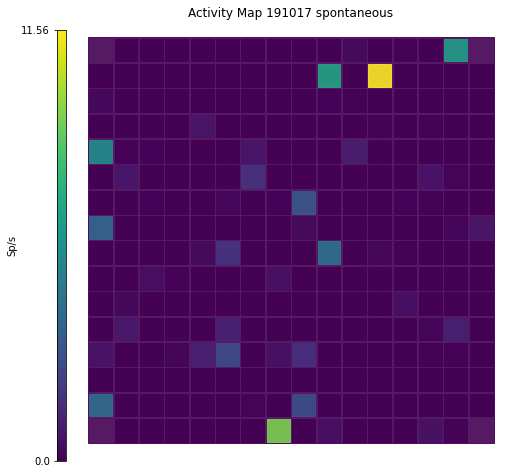

In [46]:
# fig, ax = plt.subplots(1,1, figsize=(8, 8))

# sw.plot_activity_map(loaded['sec_0-120'], cmap='viridis', colorbar = True, log= False, ax=ax, figure=fig)
# ax.set_title('Activity Map 191017 %s' %filebase)

# fig.savefig(os.path.join(plotdirectory, 'Activity_Map_191017_%s ' %filebase),  dpi=300) 

Load in the DataFrame

In [419]:
os.chdir(outpath)

In [420]:
completeframe = pd.read_pickle(str('DF_' + filebase + '_' + 'complete') + '_df.pkl')

In [421]:
completeframe.groupby(['channellabel']).describe()['firing_rate']

,count,mean,std,min,25%,50%,75%,max
channellabel,,,,,,,,
A11,1.0,2.933334,NaN,2.933334,2.933334,2.933334,2.933334,2.933334
A5,1.0,2.100001,NaN,2.100001,2.100001,2.100001,2.100001,2.100001
A6,1.0,4.008335,NaN,4.008335,4.008335,4.008335,4.008335,4.008335
A7,1.0,1.183334,NaN,1.183334,1.183334,1.183334,1.183334,1.183334
A9,1.0,0.775000,NaN,0.775000,0.775000,0.775000,0.775000,0.775000
...,...,...,...,...,...,...,...,...
R2,1.0,2.208334,NaN,2.208334,2.208334,2.208334,2.208334,2.208334
R4,3.0,0.838889,0.863711,0.216667,0.345833,0.475000,1.150000,1.825001
R5,1.0,6.141669,NaN,6.141669,6.141669,6.141669,6.141669,6.141669


In [424]:
completeframe[:15]

,unit_ids,unit_index,max_channel,channellabel,n_spikes,firing_rate,layer,ft_peak_to_valley,ft_halfwidth,ft_peak_trough_ratio,ft_repolarization_slope,ft_recovery_slope,qm_firing_rate,qm_isi_violation,qm_amplitude_cutoff,qm_presence_ratio,qm_snr,file,subrecording,recordingdate
0,0,0.0,0.0,R12,123.0,1.025000,layer4,0.00028,0.00016,-0.221239,0.087499,-0.002170,1.025000,0.000000,0.002104,0.74,3.815127,spontaneous,sec_0-120,17.10.2019
1,1,1.0,10.0,R4,219.0,1.825001,layer2-3,0.00064,0.00020,-0.116071,0.034418,-0.002202,1.825001,2.535843,0.001182,0.90,4.106966,spontaneous,sec_0-120,17.10.2019
2,10,2.0,182.0,F11,21.0,0.175000,layer5-6,0.00060,0.00028,-0.106383,0.043039,-0.010927,0.175000,0.000000,0.012323,0.07,6.900513,spontaneous,sec_0-120,17.10.2019
3,100,3.0,206.0,D12,154.0,1.283334,layer5-6,0.00104,0.00032,-0.153846,0.024931,-0.002087,1.283334,1.709417,0.414959,0.28,4.733220,spontaneous,sec_0-120,17.10.2019
4,101,4.0,206.0,D12,22.0,0.183333,layer5-6,0.00128,0.00044,-0.287500,0.034263,-0.002030,0.183333,0.000000,0.012002,0.08,7.281877,spontaneous,sec_0-120,17.10.2019
5,102,5.0,226.0,D5,216.0,1.800001,layer2-3,0.00032,0.00016,-0.191304,0.060342,-0.002055,1.800001,0.868924,0.001198,0.85,3.922570,spontaneous,sec_0-120,17.10.2019
6,103,6.0,236.0,C12,202.0,1.683334,layer5-6,0.00056,0.00020,-0.188755,0.059226,-0.003779,1.683334,0.993543,0.198706,0.84,3.716561,spontaneous,sec_0-120,17.10.2019
7,104,7.0,246.0,K11,403.0,3.358334,layer4,0.00060,0.00016,-0.097222,0.043992,-0.001407,3.358334,0.249620,0.022722,0.97,3.851218,spontaneous,sec_0-120,17.10.2019
8,105,8.0,5.0,N9,368.0,3.066668,layer2-3,0.00056,0.00016,-0.214953,0.065234,-0.001490,3.066668,0.000000,0.000863,0.94,3.721427,spontaneous,sec_0-120,17.10.2019
9,106,9.0,35.0,R9,366.0,3.050001,layer2-3,0.00056,0.00016,-0.094059,0.049776,-0.001640,3.050001,0.302641,0.086467,0.95,3.813502,spontaneous,sec_0-120,17.10.2019


1. Get the n-channels with highest firing rate

In [405]:
filteredframe = completeframe.loc[(completeframe['qm_isi_violation']<0.5) & (completeframe['qm_amplitude_cutoff'] < 0.1) & (completeframe['qm_presence_ratio'] > 0.9)]

In [406]:
filtered_units = completeframe['max_channel'].unique()

In [407]:
len(filtered_units)

124

In [408]:
u = 'sec_0-120'

Get the unitwaveforms

In [61]:

wf = st.postprocessing.get_unit_waveforms(loaded[u], sorted_dic[u], ms_before=1, ms_after=2,
                                          save_as_features=True, verbose=True)

Number of chunks: 13 - Number of jobs: 1


Extracting waveforms in chunks: 100%|##################################################| 13/13 [00:04<00:00,  2.61it/s]


In [358]:
templates = st.postprocessing.get_unit_templates(loaded[u], sorted_dic[u], max_spikes_per_unit=1, 
                                                 save_as_property=True, verbose=True)

In [432]:
# Function works for simple unit_ids

def plot_template_plot(unit_ids, dataframe):
    
    
    for unit in unit_ids:
        
        
        i = int(dataframe.loc[(dataframe['unit_ids']==unit)]['unit_index'])
        n = len(unit_ids)
        colors = iter(cm.jet(np.linspace(0, 1, len(unit_ids))))

        plt.style.use("seaborn-white")

        # get max chanel:
        j = int(dataframe[(dataframe['unit_ids']==unit)]['max_channel'])
        # acount for MCS counting system
        if j > 125:
            j = j-2

        fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(20, 20))

        sw.plot_unit_template_maps(loaded[u],  sorted_dic[u], max_spikes_per_unit=100, unit_ids=[unit], ax=ax2)


        colourcode = color=next(colors)
        ax1.plot(templates[i][j].T, color=colourcode)
        ax1.set_title(str(dataframe.loc[i]['channellabel']) + ' Unit Templates')

        ax3.plot(wf[i][:, j, :].T, color=colourcode, lw=0.05)
        ax3.set_title(str(dataframe.loc[i]['channellabel']) + ' Waveforms')

        #sw.plot_crosscorrelograms(sorted_dic[u], unit_ids=unitlist_by_index, ax=ax4, bin_size=1, window=10)


        sw.plot_rasters(sorted_dic[u], color='k', unit_ids=[unit], ax = ax4)
        
        try:
            os.mkdir(subplotpath)
        except OSError:
            print ("Creation of the directory %s failed" % outpath)
        else:
            print ("Successfully created the directory %s " % outpath)
        os.chdir(subplotpath)

        fig.savefig('unitplot_%s.png' %unit, dpi=300)

0        0
1        1
2       10
3      100
4      101
      ... 
204     95
205     96
206     97
207     98
208     99
Name: unit_ids, Length: 209, dtype: int64

In [393]:
completeframe[:15]

,unit_ids,max_channel,channellabel,n_spikes,firing_rate,layer,ft_peak_to_valley,ft_halfwidth,ft_peak_trough_ratio,ft_repolarization_slope,ft_recovery_slope,qm_firing_rate,qm_isi_violation,qm_amplitude_cutoff,qm_presence_ratio,qm_snr,file,subrecording,recordingdate
0,0,0.0,R12,123.0,1.025000,layer4,0.00028,0.00016,-0.221239,0.087499,-0.002170,1.025000,0.000000,0.002104,0.74,3.815127,spontaneous,sec_0-120,17.10.2019
1,1,10.0,R4,219.0,1.825001,layer2-3,0.00064,0.00020,-0.116071,0.034418,-0.002202,1.825001,2.535843,0.001182,0.90,4.106966,spontaneous,sec_0-120,17.10.2019
2,10,182.0,F11,21.0,0.175000,layer5-6,0.00060,0.00028,-0.106383,0.043039,-0.010927,0.175000,0.000000,0.012323,0.07,6.900513,spontaneous,sec_0-120,17.10.2019
3,100,206.0,D12,154.0,1.283334,layer5-6,0.00104,0.00032,-0.153846,0.024931,-0.002087,1.283334,1.709417,0.414959,0.28,4.733220,spontaneous,sec_0-120,17.10.2019
4,101,206.0,D12,22.0,0.183333,layer5-6,0.00128,0.00044,-0.287500,0.034263,-0.002030,0.183333,0.000000,0.012002,0.08,7.281877,spontaneous,sec_0-120,17.10.2019
5,102,226.0,D5,216.0,1.800001,layer2-3,0.00032,0.00016,-0.191304,0.060342,-0.002055,1.800001,0.868924,0.001198,0.85,3.922570,spontaneous,sec_0-120,17.10.2019
6,103,236.0,C12,202.0,1.683334,layer5-6,0.00056,0.00020,-0.188755,0.059226,-0.003779,1.683334,0.993543,0.198706,0.84,3.716561,spontaneous,sec_0-120,17.10.2019
7,104,246.0,K11,403.0,3.358334,layer4,0.00060,0.00016,-0.097222,0.043992,-0.001407,3.358334,0.249620,0.022722,0.97,3.851218,spontaneous,sec_0-120,17.10.2019
8,105,5.0,N9,368.0,3.066668,layer2-3,0.00056,0.00016,-0.214953,0.065234,-0.001490,3.066668,0.000000,0.000863,0.94,3.721427,spontaneous,sec_0-120,17.10.2019
9,106,35.0,R9,366.0,3.050001,layer2-3,0.00056,0.00016,-0.094059,0.049776,-0.001640,3.050001,0.302641,0.086467,0.95,3.813502,spontaneous,sec_0-120,17.10.2019


In [579]:
# Function works for simple unit_ids

def plot_template_fromchannel(channel, dataframe):
    
    units_ids = dataframe.loc[(dataframe['channellabel']==channel)]['unit_ids']
    
    plt.style.use("seaborn-white")
    colors = iter(cm.jet(np.linspace(0, 1, len(units_ids))))
    # get max chanel:


    fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(2, 3, figsize=(30, 20))

    sw.plot_unit_template_maps(loaded[u],  sorted_dic[u], max_spikes_per_unit=100, unit_ids=[list(units_ids)[0]], ax=ax6)
   
    
    for unit in units_ids:


        i = int(dataframe.loc[(dataframe['unit_ids']==unit)]['unit_index'])
        n = len(unit_ids)
        
        
        j = int(dataframe[(dataframe['unit_ids']==unit)]['max_channel'])
        # acount for MCS counting system
        if j > 125:
            j = j-2

        colourcode = next(colors)
        ax1.plot(templates[i][j].T, color=colourcode)
        ax1.set_title(str(dataframe.loc[i]['channellabel']) + ' Unit Templates')
        

        ax4.plot(wf[i][:, j, :].T, color=colourcode, lw=0.05)
        ax4.set_title(str(dataframe.loc[i]['channellabel']) + ' Waveforms')

    #sw.plot_crosscorrelograms(sorted_dic[u], unit_ids=unitlist_by_index, ax=ax4, bin_size=1, window=10)


    sw.plot_rasters(sorted_dic[u], color='k', unit_ids=list(units_ids), ax = ax5)
    
    sw.plot_spectrogram(loaded[u], channel=j, nfft=256, freqrange=[0, 10000], cmap='nipy_spectral', ax=ax2)
    ax2.set_title('Spectrogram')

    sw.plot_spectrum(loaded[u], channels=[j], ax=ax3)
    
    try:
        os.mkdir(subplotpath)
    except OSError:
        print ("Creation of the directory %s failed" % outpath)
    else:
        print ("Successfully created the directory %s " % outpath)
    os.chdir(subplotpath)

    fig.savefig('unitplot_%s.png' %channel, dpi=300)

Creation of the directory D:\Files_Reutlingen_Jenny\main_191017\_output_Spikesorting_30042021_spontaneous_spikesorting failed


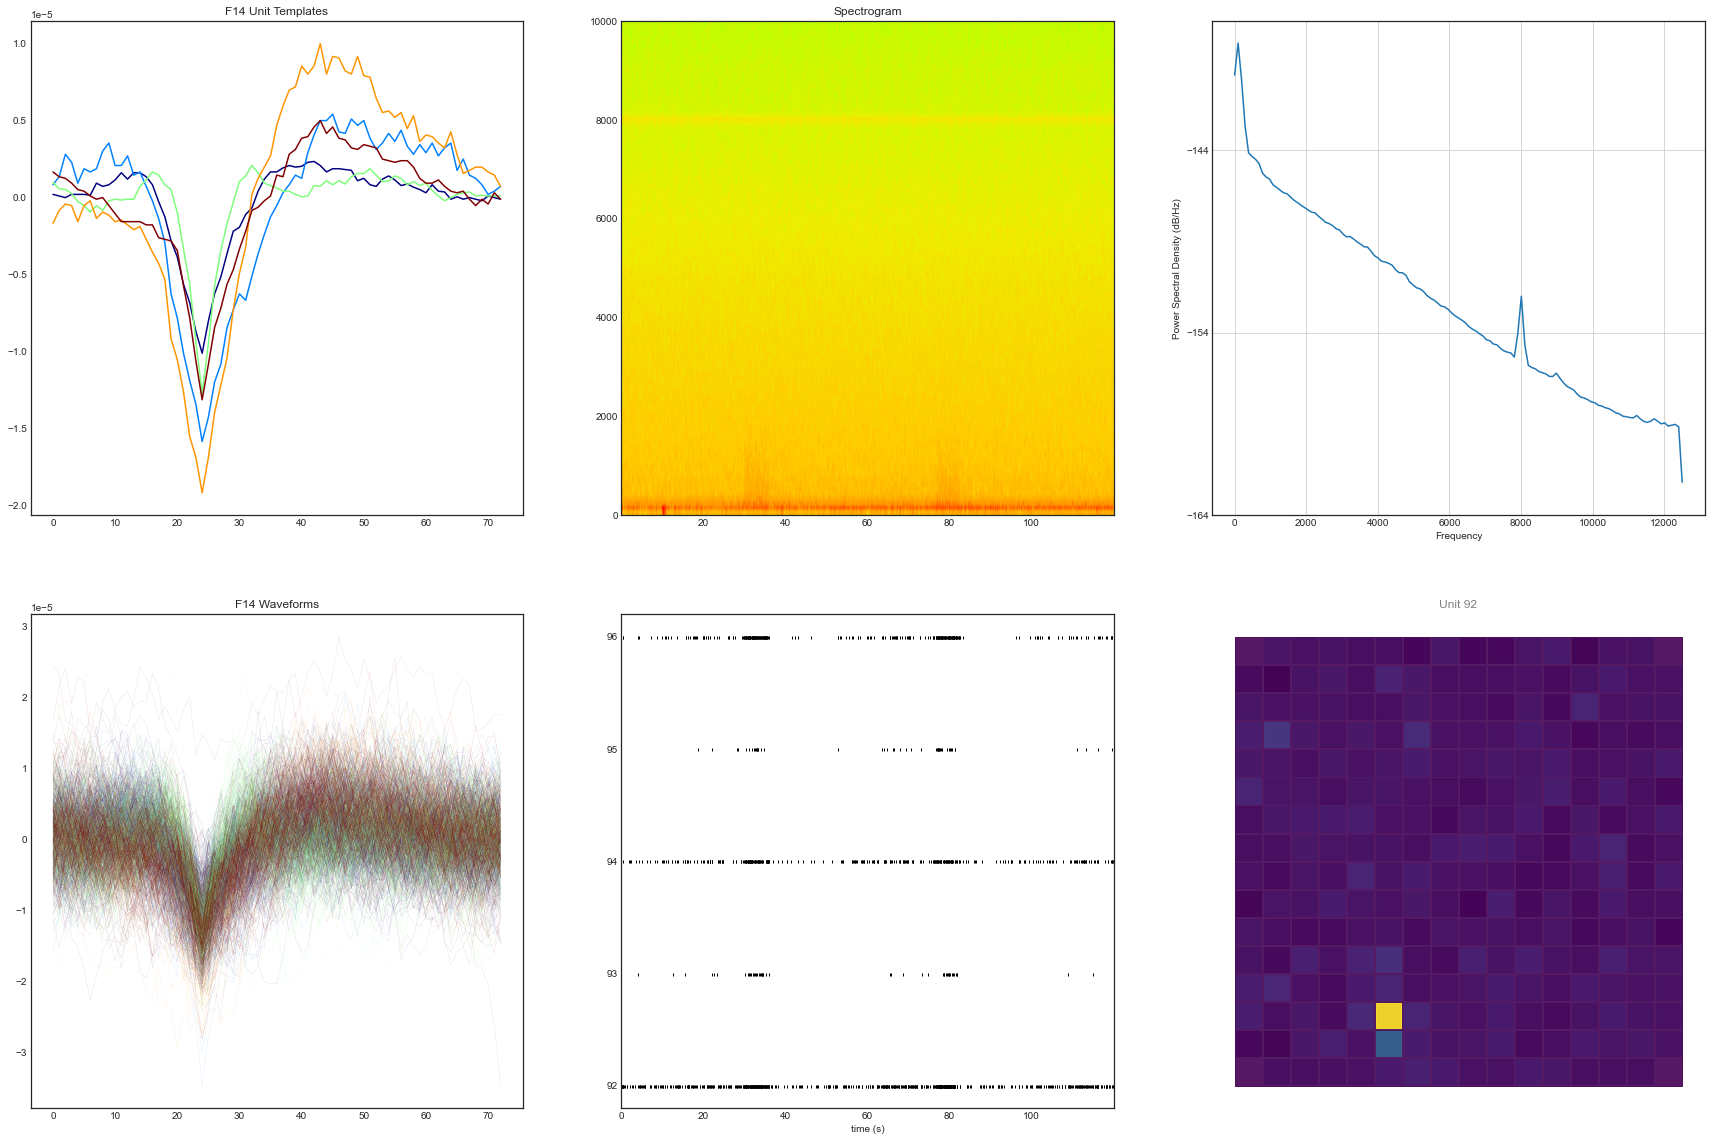

In [626]:
plot_template_fromchannel('F14', completeframe)

find channels with the biggest firing rate:

In [621]:
mostspikes = completeframe.groupby('channellabel')['n_spikes'].sum()
largest_five = mostspikes.nlargest(5)

In [622]:
largest_five

channellabel
E12    2089.0
E11    2054.0
F11    1912.0
F13    1669.0
F14    1354.0
Name: n_spikes, dtype: float64

In [611]:
layergroup = completeframe.groupby('layer')

In [617]:
layergroup['firing_rate'].describe()

,count,mean,std,min,25%,50%,75%,max
layer,,,,,,,,
layer1,11.0,2.211364,1.184960,0.233333,1.470834,2.208334,3.112501,4.050001
layer2-3,80.0,2.065522,1.319284,0.175000,1.204167,1.891667,2.766668,6.141669
layer4,18.0,1.918056,1.356813,0.183333,0.837500,1.675001,2.735418,4.675002
layer5-6,100.0,1.969751,1.854584,0.116667,0.593750,1.295834,3.147918,10.791670


In [638]:
layer1 = completeframe.loc[completeframe.layer == 'layer1', 'firing_rate']
layer2_3 = completeframe.loc[completeframe.layer == 'layer2-3', 'firing_rate']
layer4 = completeframe.loc[completeframe.layer == 'layer4', 'firing_rate']
layer5_6 = completeframe.loc[completeframe.layer == 'layer5-6', 'firing_rate']
wm = completeframe.loc[completeframe.layer == 'whitematter', 'firing_rate']

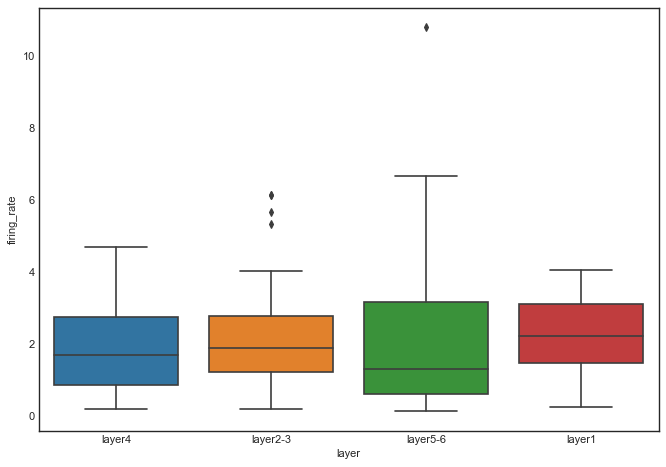

In [653]:
#fig, ((ax1, ax2)) = plt.subplots(2, 1, figsize=(10,10))

plt.figure(figsize=(10,7), dpi= 80)
sns.boxplot(x='layer', y="firing_rate", data=completeframe)
#ax1.set_title('Firing Rate per Layer')

plt.savefig(os.path.join(subplotpath, 'Boxplot_Firing_Rate_Layer_%s ' %filebase))


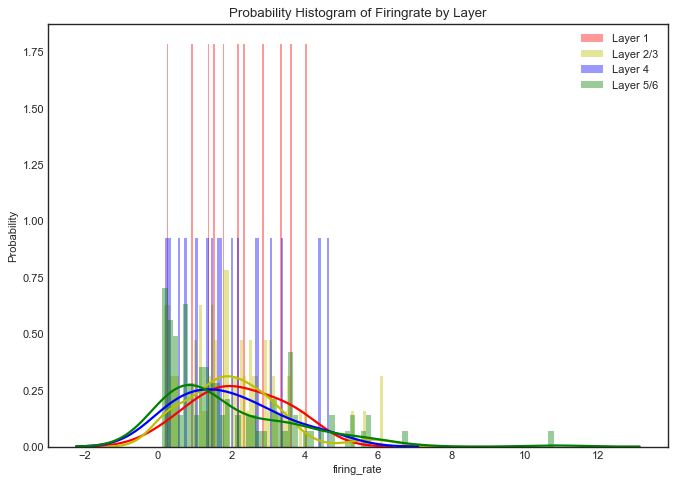

In [652]:
kwargs = dict(hist_kws={'alpha':.4}, kde_kws={'linewidth':2}, bins=75)

plt.figure(figsize=(10,7), dpi= 80)
sns.distplot(layer1, **kwargs, color='r', label='Layer 1')
sns.distplot(layer2_3, **kwargs, color='y', label='Layer 2/3')
sns.distplot(layer4, **kwargs, color='b', label = 'Layer 4')
sns.distplot(layer5_6, **kwargs, color='g', label = 'Layer 5/6')
#sns.distplot(wm, **kwargs, color='y', label = 'Whitematter')
plt.gca().set(title='Probability Histogram of Firingrate by Layer', ylabel='Probability')
plt.legend()

plt.savefig(os.path.join(subplotpath, 'Distplot_Firing_Rate_Layer_%s ' %filebase))

In [651]:
subplotpath

'D:\\Files_Reutlingen_Jenny\\Plots\\_output_Spikesorting_30042021_spontaneous_spikesorting'